In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [33]:
all_df=pd.read_csv('TrainDataset2023.csv', index_col=False)
all_df.head() 

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [34]:
all_df.drop('ID', axis=1, inplace=True)
all_df.drop('pCR (outcome)', axis=1, inplace=True)

In [35]:
A=all_df.columns.drop('RelapseFreeSurvival (outcome)')

In [36]:
X=all_df[A]
y=all_df['RelapseFreeSurvival (outcome)']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
#A random forest is a meta estimator that fits a number of classifying
#decision trees on various sub-samples of the dataset and uses averaging
#to improve the predictive accuracy and control over-fitting.
#The sub-sample size is controlled with the `max_samples` parameter if
#`bootstrap=True` (default), otherwise the whole dataset is used to build
#each tree.
h=RandomForestRegressor(n_estimators=100,random_state=1)

In [49]:
h.fit(X_train,y_train)
y_pred=h.predict(X_test)
print('The Mean squared error is: %.2f'% mean_squared_error(y_test,y_pred))
print('The Mean absolute error is: %.2f'% mean_absolute_error(y_test,y_pred))

The Mean squared error is: 1015.10
The Mean absolute error is: 25.22


In [40]:
# Determine variable importance
#pd.Series(...): Creates a pandas Series with the feature 
#importances:using the feature names as the index.
#.sort_index(): Sorts the Series by its index (feature names in this case).

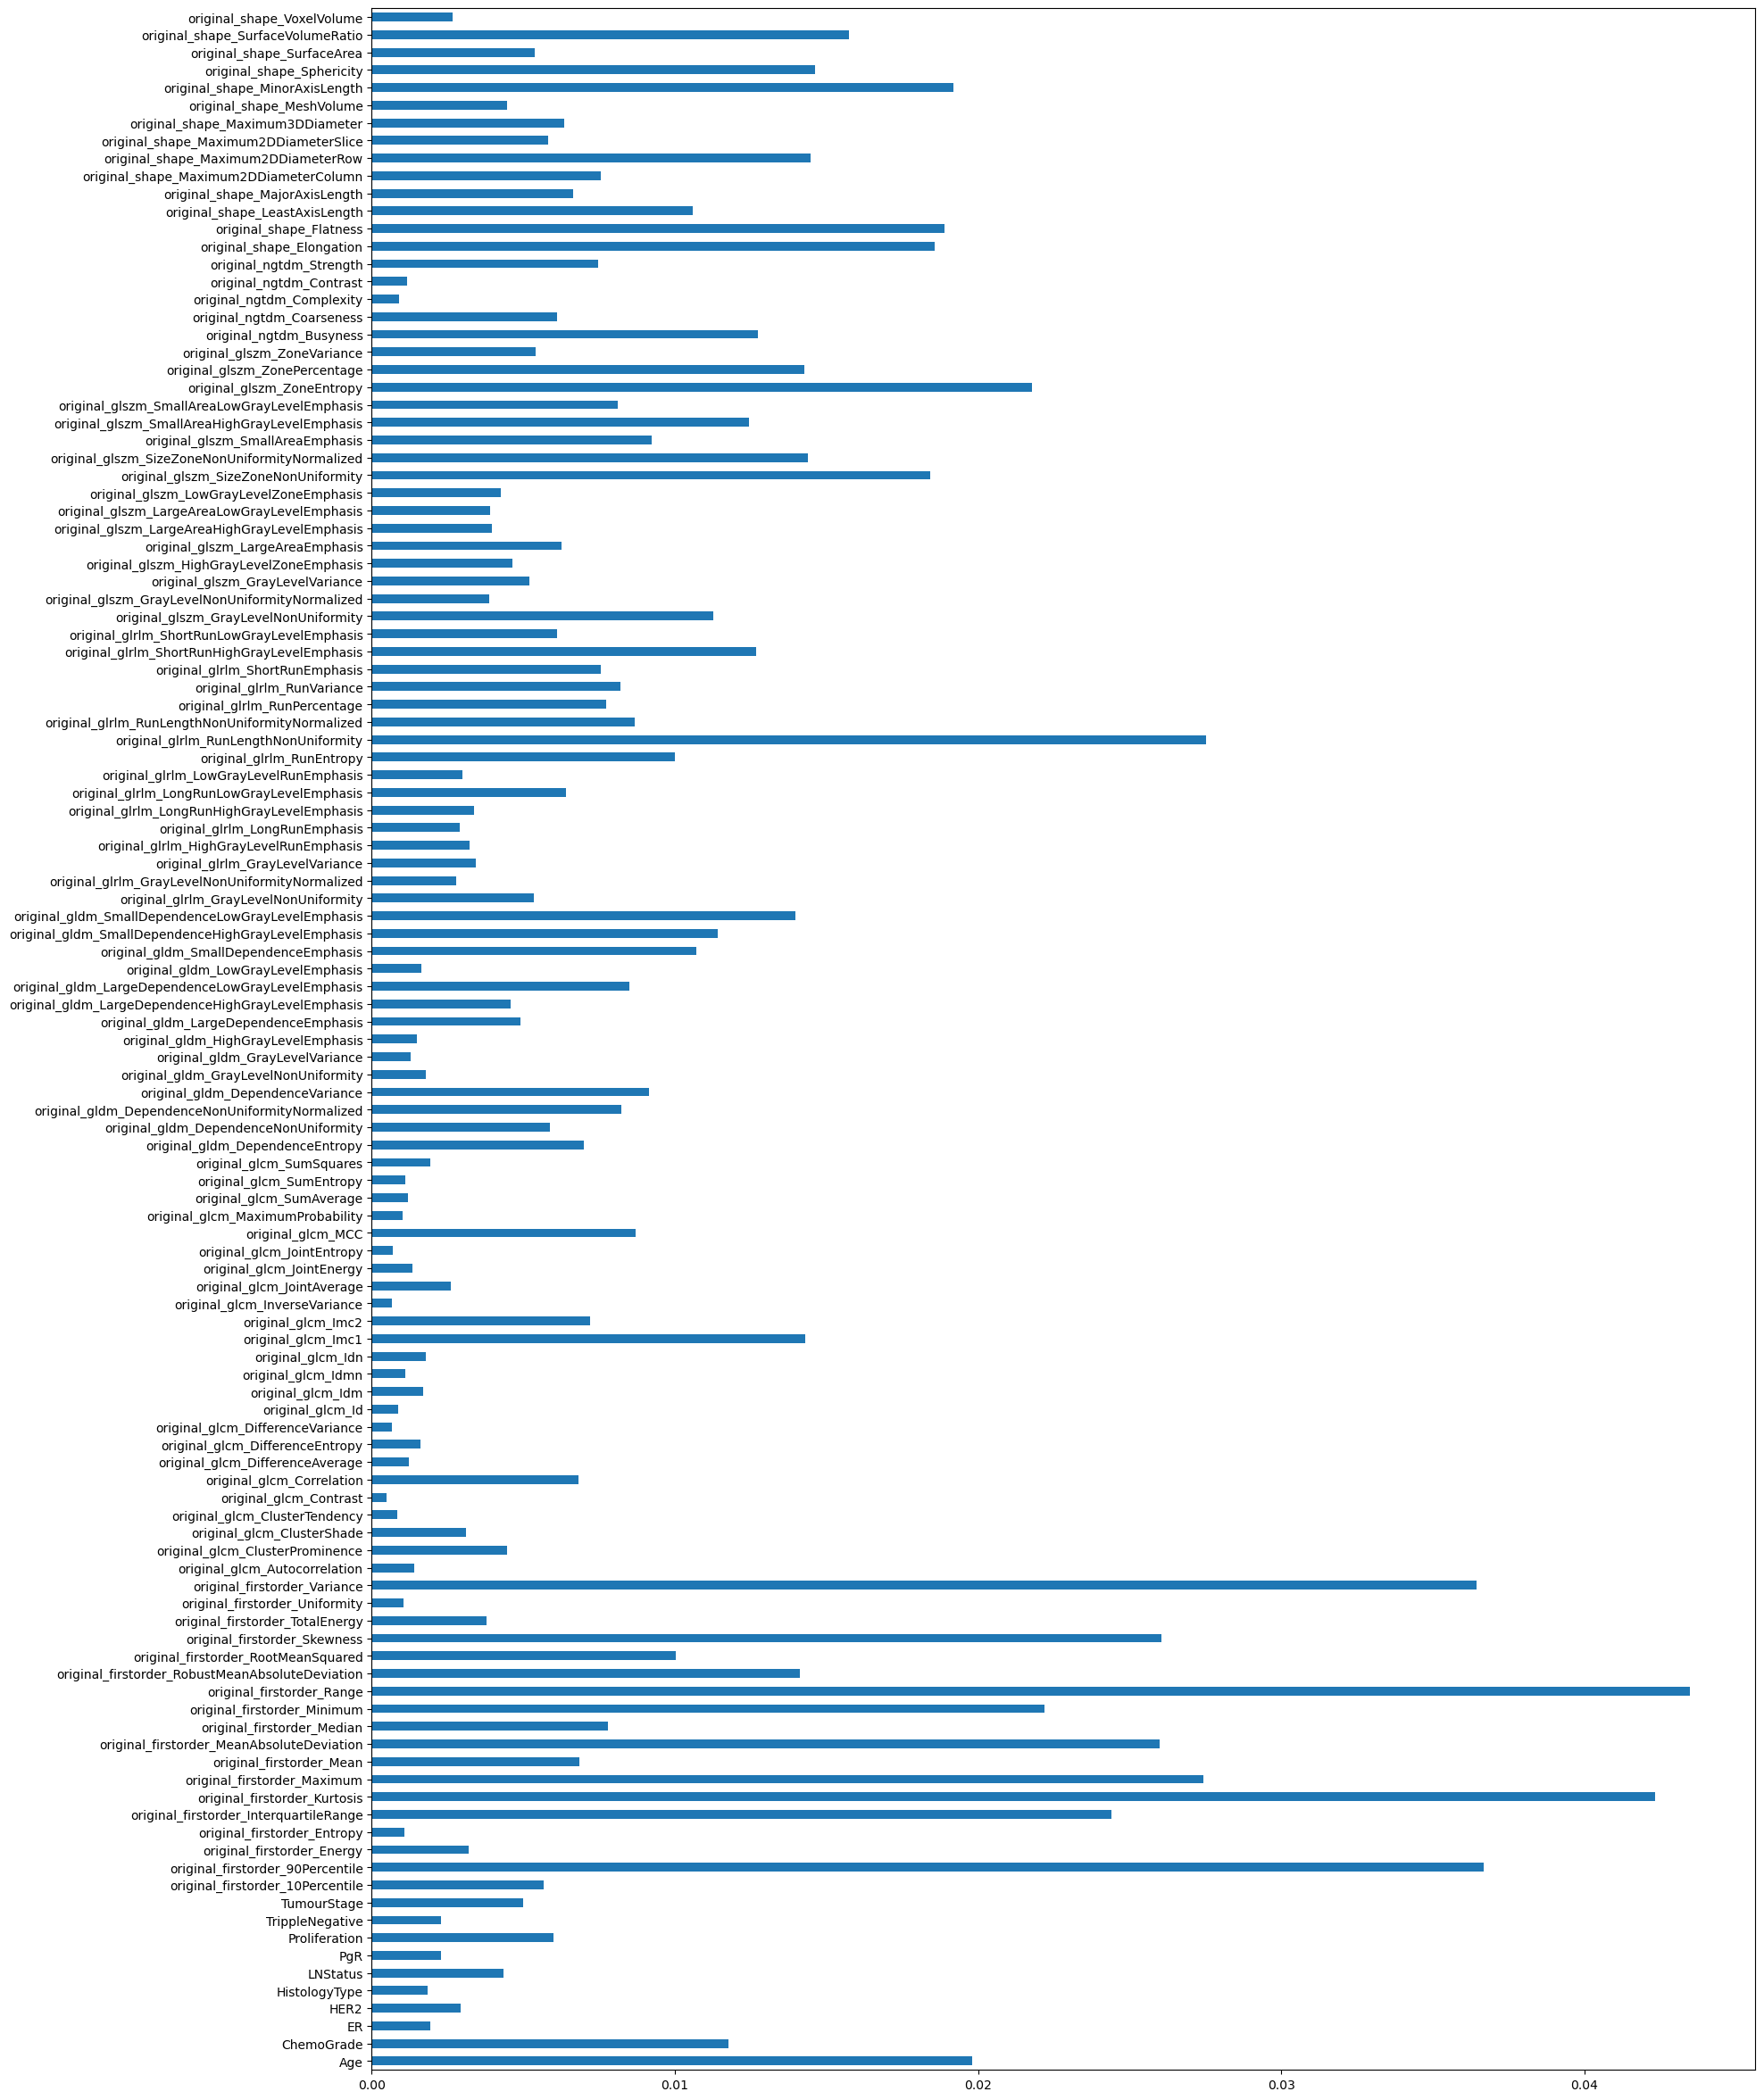

In [44]:
model_ranks=pd.Series(h.feature_importances_,index=X_train.columns,name="Importance").sort_index()
ax=model_ranks.plot(figsize=(20,30),kind ='barh');